In [86]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [89]:
train= pd.read_csv("train.csv",index_col='PassengerId')
test=pd.read_csv("test.csv",index_col='PassengerId')
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [90]:
cor=train.corr()
print(cor)

          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000


In [91]:
print(train.isnull().sum())
print(train.Embarked.unique())

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64
['S' 'C' 'Q' nan]


In [92]:
train=train.dropna(axis=0,subset=['Embarked'])
train = train.drop(['Cabin','Name','Ticket','Fare','Age'],axis=1)
print(train)

             Survived  Pclass     Sex  SibSp  Parch Embarked
PassengerId                                                 
1                   0       3    male      1      0        S
2                   1       1  female      1      0        C
3                   1       3  female      0      0        S
4                   1       1  female      1      0        S
5                   0       3    male      0      0        S
...               ...     ...     ...    ...    ...      ...
887                 0       2    male      0      0        S
888                 1       1  female      0      0        S
889                 0       3  female      1      2        S
890                 1       1    male      0      0        C
891                 0       3    male      0      0        Q

[889 rows x 6 columns]


In [93]:
train=pd.get_dummies(train,columns=['Sex','Embarked'])
train

,Survived,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,1,0,0,1,0,0,1
2,1,1,1,0,1,0,1,0,0
3,1,3,0,0,1,0,0,0,1
4,1,1,1,0,1,0,0,0,1
5,0,3,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
887,0,2,0,0,0,1,0,0,1
888,1,1,0,0,1,0,0,0,1
889,0,3,1,2,1,0,0,0,1


In [94]:
train=train.drop(['Sex_male','Pclass','Embarked_S'],axis=1)


In [95]:
print(train.corr())
cor=train.corr()

            Survived     SibSp     Parch  Sex_female  Embarked_C  Embarked_Q
Survived    1.000000 -0.034040  0.083151    0.541585    0.169966    0.004536
SibSp      -0.034040  1.000000  0.414542    0.116348   -0.060074   -0.026692
Parch       0.083151  0.414542  1.000000    0.247508   -0.011588   -0.081585
Sex_female  0.541585  0.116348  0.247508    1.000000    0.084520    0.075217
Embarked_C  0.169966 -0.060074 -0.011588    0.084520    1.000000   -0.148646
Embarked_Q  0.004536 -0.026692 -0.081585    0.075217   -0.148646    1.000000


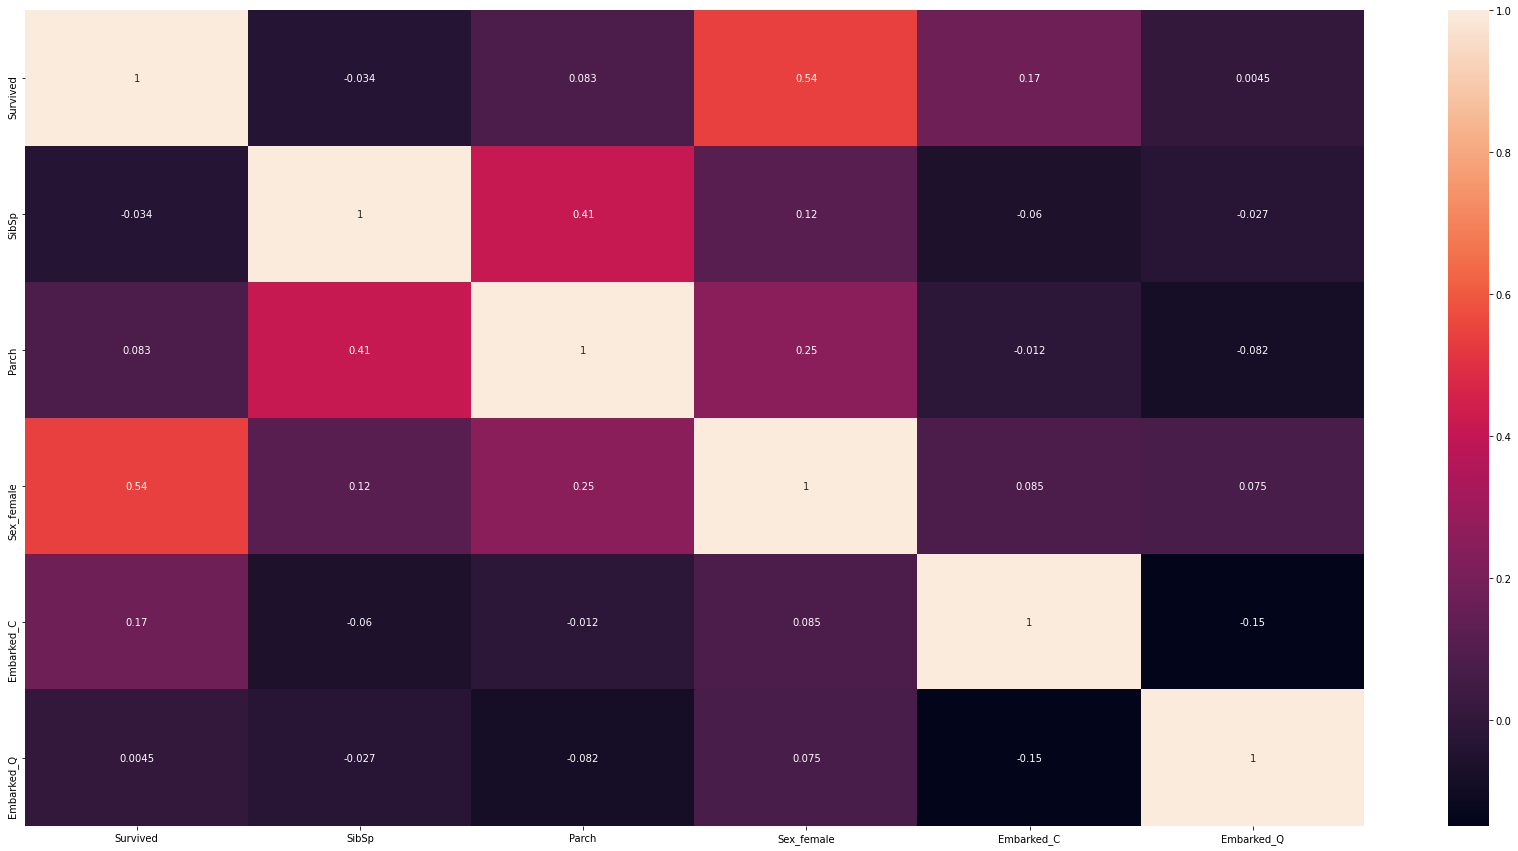

In [96]:
fig,ax=plt.subplots(figsize=(30,15))
sns.heatmap(cor,annot=True)

In [97]:
y=train.Survived
X=train.drop("Survived",axis=1)

In [98]:
def mean(y_test,output):
    val_mae = mean_absolute_error(y_test,output)
    return(val_mae)


In [99]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=0)

In [100]:
model=RandomForestClassifier(n_estimators=100, max_depth=3,random_state=0)
model.fit(X_train,y_train)
output=model.predict(X_test)
print(mean(y_test,output))

0.23232323232323232


In [101]:
lr=LogisticRegression(random_state=0)
lr.fit(X_train,y_train)
output=model.predict(X_test)
print(mean(y_test,output))

0.23232323232323232


In [102]:
sc=SVC(C=1,gamma='auto')
naivec=GaussianNB()
voting= VotingClassifier(estimators=[('lr',lr),('svc',sc),('naive',naivec)],voting='hard')
voting.fit(X_train,y_train)
best= voting.predict(X_test)

In [103]:
for model in(lr,sc,naivec):
    model.fit(X_train,y_train)
    check=model.predict(X_test)
    print(model,mean(y_test,check))

LogisticRegression(random_state=0) 0.23905723905723905
SVC(C=1, gamma='auto') 0.23232323232323232
GaussianNB() 0.2760942760942761


In [104]:
print(mean(y_test,best))

0.2356902356902357


In [105]:
print(X_test)
print(X_train)

             SibSp  Parch  Sex_female  Embarked_C  Embarked_Q
PassengerId                                                  
15               0      0           1           0           0
160              8      2           0           0           0
764              1      2           1           0           0
742              1      0           0           0           0
484              0      0           1           0           0
...            ...    ...         ...         ...         ...
244              0      0           0           0           0
454              1      0           0           1           0
172              4      1           0           0           1
189              1      1           0           0           1
800              1      1           1           0           0

[297 rows x 5 columns]
             SibSp  Parch  Sex_female  Embarked_C  Embarked_Q
PassengerId                                                  
434              0      0           0         

In [106]:
test


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [107]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [108]:
test=pd.get_dummies(test,columns=['Sex','Embarked'])
test= test.drop(['Name','Cabin','Fare','Age','Ticket','Cabin','Pclass','Sex_male','Embarked_S'],axis=1)

In [109]:
testoutput=model.predict(test)


In [110]:
submit = pd.DataFrame({'PassengerId':test.index,'Survived':testoutput})
submit.to_csv('submit.csv', index = False)